<a href="https://colab.research.google.com/github/JoaoJuniorGrb/FAI_CRG/blob/main/regess%C3%A3o_com_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9373 - val_loss: 0.7145
Epoch 2/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 0.6600 - val_loss: 0.5344
Epoch 3/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 0.5403 - val_loss: 0.4684
Epoch 4/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.5073 - val_loss: 0.4461
Epoch 5/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5121 - val_loss: 0.4398
Epoch 6/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.4901 - val_loss: 0.4382
Epoch 7/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4866 - val_loss: 0.4365
Epoch 8/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5309 - val_loss: 0.4365
Epoch 9/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5030 - val_loss: 0.4371
Epoch 10/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4876 - val_loss: 0.4366
Epoch 11/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4914 - val_loss: 0.4365
Epoch 12/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 

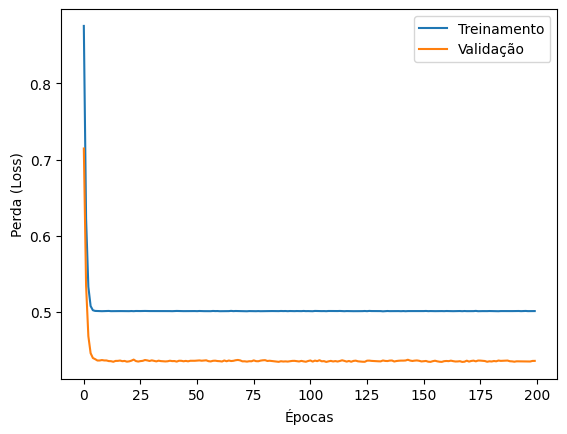

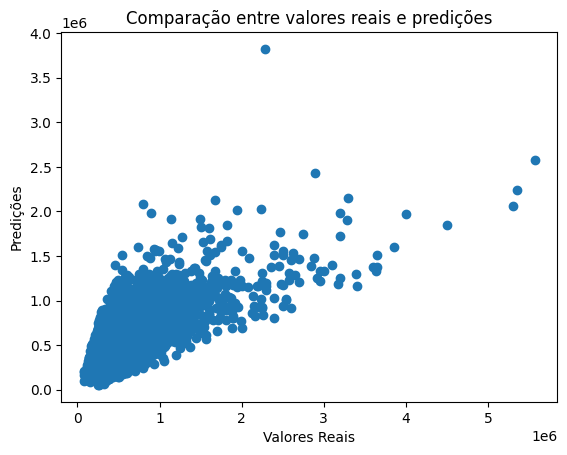

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregar base de dados
base = pd.read_csv('house_prices.csv')

# Variáveis independentes e dependentes
x = base.iloc[:, 5:6].values
y = base.iloc[:, 2:3].values

# Escalonamento dos dados
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

# Divisão em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

# Modelo Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(x_treino, y_treino, epochs=200, validation_split=0.2, verbose=1)

# Avaliação do modelo
loss = model.evaluate(x_teste, y_teste)
print(f'Perda (Loss): {loss}')

# Predições
y_pred = model.predict(x_teste)

# Reverter a padronização para valores originais
y_pred_original = scaler_y.inverse_transform(y_pred)
y_teste_original = scaler_y.inverse_transform(y_teste)

# Plotando a perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.legend()
plt.show()

# Comparação de predições e valores reais
plt.scatter(y_teste_original, y_pred_original)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Comparação entre valores reais e predições')
plt.show()


In [14]:
# Valor aleatório (exemplo: área de 1500 pés quadrados)
valor_aleatorio = 800

# Padronizar o valor aleatório
valor_aleatorio_padronizado = scaler_x.transform([[valor_aleatorio]])

# Fazer a previsão
predicao_padronizada = model.predict(valor_aleatorio_padronizado)

# Reverter a padronização da previsão
predicao_original = scaler_y.inverse_transform(predicao_padronizada)

print(f'Valor de entrada (original): {valor_aleatorio}')
print(f'Valor previsto (original): {predicao_original[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Valor de entrada (original): 800
Valor previsto (original): 172925.546875


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reverter padronização das predições e dos valores reais
y_pred_original = scaler_y.inverse_transform(y_pred)
y_teste_original = scaler_y.inverse_transform(y_teste)

# Calcular métricas no valor original
mse_original = mean_squared_error(y_teste_original, y_pred_original)
mae_original = mean_absolute_error(y_teste_original, y_pred_original)

print(f"MSE (original): {mse_original}")
print(f"MAE (original): {mae_original}")

MSE (original): 74508049395.68262
MAE (original): 178888.54128190546
